[*********************100%%**********************]  5 of 5 completed


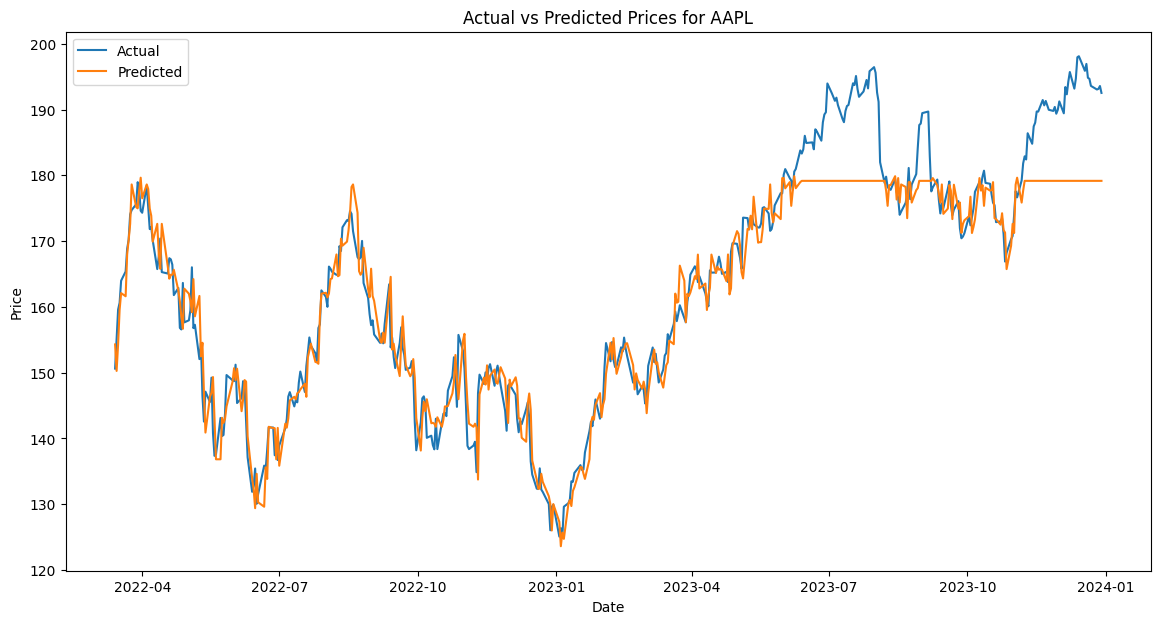

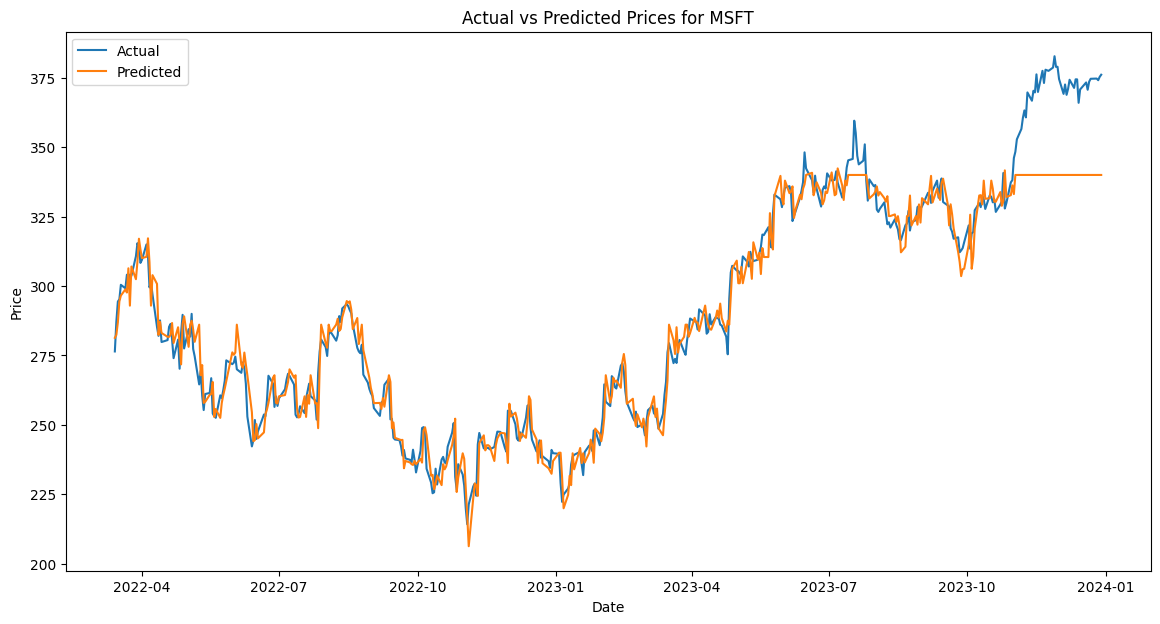

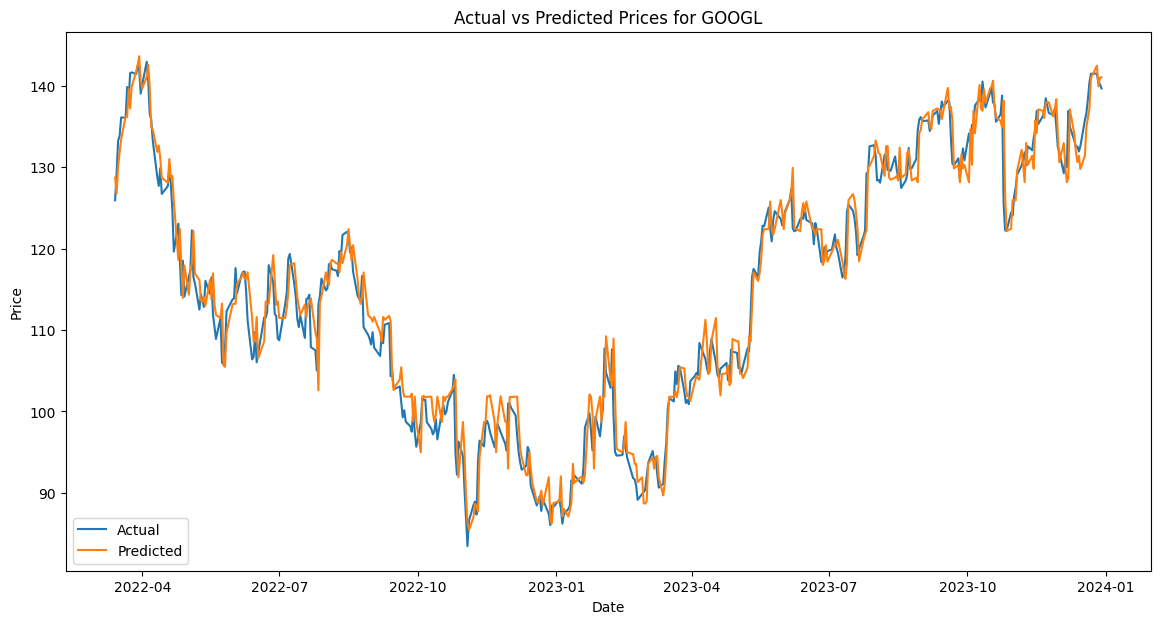

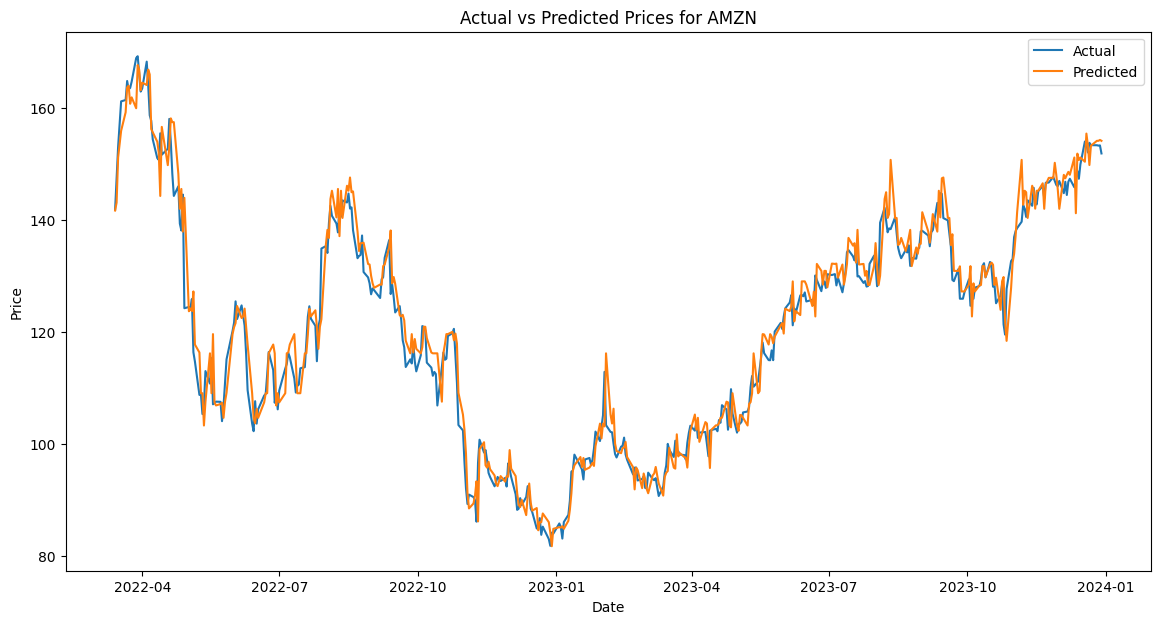

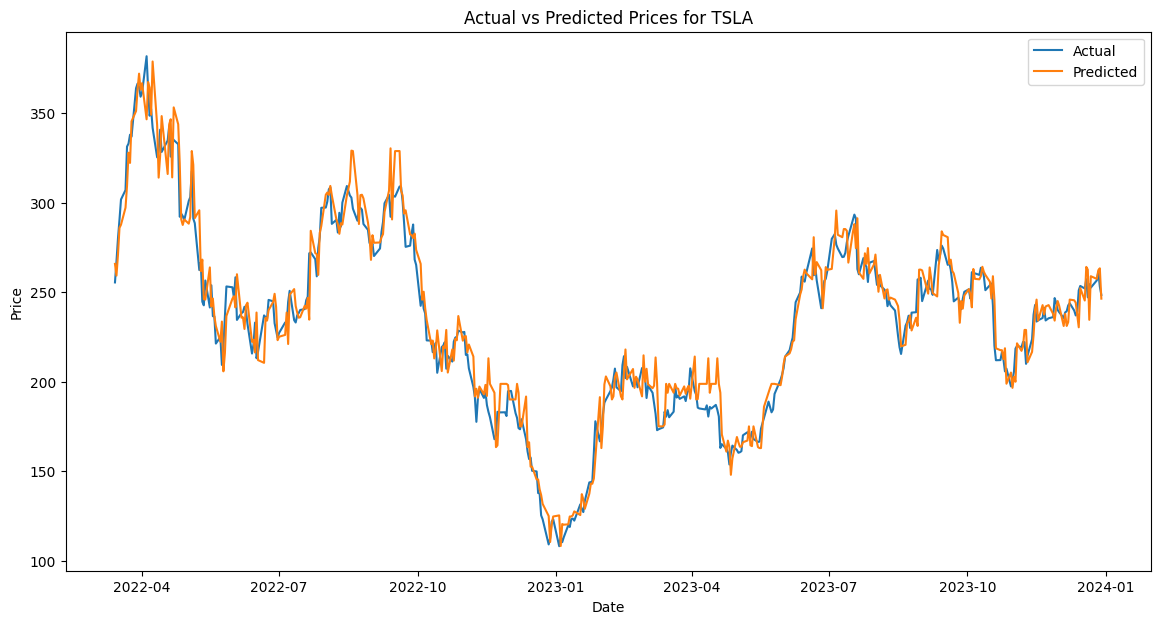

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Download Stock Data
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(stocks, start="2015-01-01", end="2024-01-01")

# Step 2: Prepare the Data
# We'll use the closing price for modeling
data_close = data['Close']

# Dictionary to store models and predictions
models = {}
predictions = {}

# Train a Random Forest model for each stock
for stock in stocks:
    stock_data = data_close[[stock]].dropna()
    stock_data['Returns'] = stock_data[stock].pct_change().dropna()
    
    # Feature: Previous day's closing price
    stock_data['Lag1'] = stock_data[stock].shift(1)
    stock_data = stock_data.dropna()
    
    # Features and target
    X = stock_data[['Lag1']]
    y = stock_data[stock]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Store the model and predictions
    models[stock] = model
    predictions[stock] = (y_test, y_pred)
    
    # Plot actual vs predicted prices
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted Prices for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


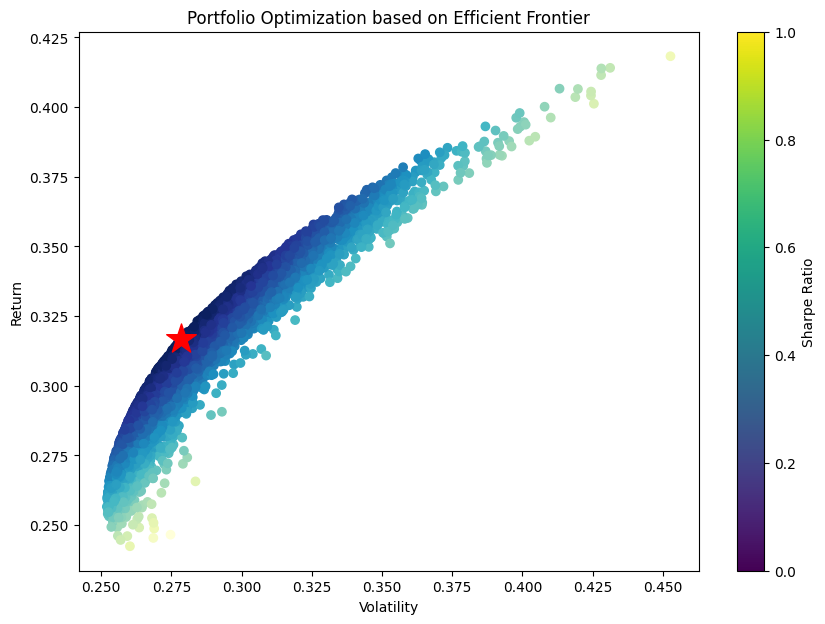

In [5]:
import numpy as np

# Calculate mean returns and covariance matrix
returns = data_close.pct_change().dropna()
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Number of portfolios to simulate
num_portfolios = 10000

# Store results
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = results[0, i] / results[1, i]  # Sharpe Ratio

# Locate the portfolio with the highest Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_stddev = results[1, max_sharpe_idx]
max_sharpe_weights = weights

# Plot Efficient Frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.scatter(max_sharpe_stddev, max_sharpe_return, marker='*', color='r', s=500)
plt.title('Portfolio Optimization based on Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Display the portfolio with the highest Sharpe Ratio
portfolio = pd.DataFrame({
    'Stock': stocks,
    'Weight': max_sharpe_weights
})

# import ace_tools as tools; tools.display_dataframe_to_user(name="Optimal Portfolio", dataframe=portfolio)
